In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
from pandas_profiling import ProfileReport

import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go

In [2]:
data_dir = Path('data')
full_df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet')
)

In [3]:
full_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5,None
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,None
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,None
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,None
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,None


In [4]:
full_df.shape

(24649092, 19)

# Análisis de fechas 

## Fechas que no corresponden al año

In [5]:
full_df.tpep_pickup_datetime.min()

Timestamp('2002-12-31 23:06:55')

In [6]:
full_df[full_df.tpep_pickup_datetime == full_df.tpep_pickup_datetime.min()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
697117,2,2002-12-31 23:06:55,2002-12-31 23:08:03,1.0,0.0,1.0,N,264,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [7]:
full_df.tpep_pickup_datetime.max()

Timestamp('2021-06-10 10:10:48')

In [8]:
full_df[full_df.tpep_pickup_datetime == full_df.tpep_pickup_datetime.max()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1015665,2,2021-06-10 10:10:48,2021-06-10 10:41:42,1.0,5.85,1.0,N,13,239,1,24.0,0.0,0.5,4.1,0.0,0.3,31.4,2.5,NaN


In [9]:
full_df.tpep_dropoff_datetime.min()

Timestamp('2002-12-31 23:08:03')

In [10]:
full_df[full_df.tpep_dropoff_datetime == full_df.tpep_dropoff_datetime.min()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
697117,2,2002-12-31 23:06:55,2002-12-31 23:08:03,1.0,0.0,1.0,N,264,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [11]:
full_df.tpep_dropoff_datetime.max()

Timestamp('2021-06-10 10:41:42')

In [12]:
full_df[full_df.tpep_dropoff_datetime == full_df.tpep_dropoff_datetime.max()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1015665,2,2021-06-10 10:10:48,2021-06-10 10:41:42,1.0,5.85,1.0,N,13,239,1,24.0,0.0,0.5,4.1,0.0,0.3,31.4,2.5,NaN


In [13]:
# Only 2020
full_df = full_df[
    (full_df.tpep_pickup_datetime >= '2020-01-01 00:00:00') & (full_df.tpep_pickup_datetime < '2021-01-01 00:00:00')
].reset_index(drop=True)
full_df = full_df[
    (full_df.tpep_dropoff_datetime >= '2020-01-01 00:00:00') & (full_df.tpep_dropoff_datetime < '2021-01-01 00:00:00')
].reset_index(drop=True)

## Pickup date greater than dropoff 

In [14]:
full_df[full_df.tpep_pickup_datetime > full_df.tpep_dropoff_datetime].shape

(20009, 19)

In [15]:
full_df = full_df[full_df.tpep_pickup_datetime <= full_df.tpep_dropoff_datetime].reset_index(drop=True)

In [16]:
full_df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [17]:
full_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,2.462862e+07,2.383849e+07,2.462862e+07,2.383849e+07,2.462862e+07,2.462862e+07,2.462862e+07,2.462862e+07,2.462862e+07,2.462862e+07,2.462862e+07,2.462862e+07,2.462862e+07,2.462862e+07,2.383849e+07
mean,1.679106e+00,1.467979e+00,3.525521e+00,1.048556e+00,1.638896e+02,1.611976e+02,1.239321e+00,1.265831e+01,1.072686e+00,5.128094e-01,2.083705e+00,3.041013e-01,2.975546e-01,1.841622e+01,2.271175e+00
std,4.883798e-01,1.112775e+00,3.251670e+02,7.610877e-01,6.671749e+01,7.094569e+01,5.272710e-01,2.742017e+02,1.007588e+02,1.007512e+02,2.611118e+00,1.605496e+00,3.746049e-02,3.403657e+02,7.473299e-01
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.259000e+03,-2.700000e+01,-5.000000e-01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.900000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.650000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.920000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.760000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,6.000000e+00,9.000000e+00,3.509149e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,9.983100e+05,5.000008e+05,5.000005e+05,1.393560e+03,9.255000e+02,3.000000e-01,1.000004e+06,3.000000e+00


In [18]:
# profile = ProfileReport(full_df, title="Pandas Profiling Report")

In [19]:
# profile.to_file("your_report.html")

In [20]:
# profile.to_notebook_iframe()

In [21]:
full_df['VendorID'].value_counts()

2    16598518
1     8004691
6       25283
5         128
Name: VendorID, dtype: int64

## Regiones donde más suben y bajan pasajeros

In [22]:
df_pickup = pd.DataFrame(
    full_df['PULocationID'].value_counts().reset_index().values, columns=['LocationID', 'count_pickup'])

In [23]:
df_dropoff = pd.DataFrame(
    full_df['DOLocationID'].value_counts().reset_index().values, columns=['LocationID', 'count_df_dropoff'])

In [24]:
pickup_dropoff = pd.merge(df_pickup, df_dropoff, on='LocationID', how='inner')

In [25]:
pickup_dropoff['total'] = pickup_dropoff['count_pickup'] + pickup_dropoff['count_pickup']

In [26]:
df_geom_ny = pd.read_csv('data/taxi_zones.csv')

In [27]:
pickup_dropoff = pd.merge(pickup_dropoff, df_geom_ny, on='LocationID', how='inner')

In [28]:
pickup_dropoff[[
    'LocationID', 'count_pickup', 'count_df_dropoff', 'total', 'zone', 'borough', 'the_geom']].head()

,LocationID,count_pickup,count_df_dropoff,total,zone,borough,the_geom
0,237,1145392,1015417,2290784,Upper East Side South,Manhattan,MULTIPOLYGON (((-73.96612747299989 40.76217929...
1,236,1089568,1126305,2179136,Upper East Side North,Manhattan,MULTIPOLYGON (((-73.95779380499984 40.77359989...
2,161,946842,843669,1893684,Midtown Center,Manhattan,MULTIPOLYGON (((-73.97534377999993 40.75529969...
3,186,862304,553392,1724608,Penn Station/Madison Sq West,Manhattan,MULTIPOLYGON (((-73.99096832799995 40.74542088...
4,162,831580,666125,1663160,Midtown East,Manhattan,MULTIPOLYGON (((-73.9712170449999 40.755193323...


In [29]:
# Map create
# https://medium.com/analytics-vidhya/mapping-indonesias-village-border-with-plotly-from-long-lat-coordinates-to-wkt-strings-975fd002326e

In [30]:
pickup_dropoff['geometry'] = gpd.GeoSeries.from_wkt(pickup_dropoff['the_geom'])

In [31]:
pickup_dropoff = gpd.GeoDataFrame(pickup_dropoff)

In [32]:
pickup_dropoff.tail()

,LocationID,count_pickup,count_df_dropoff,total,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,borough,geometry
254,176,29,236,58,176,0.151995,MULTIPOLYGON (((-74.12187198599999 40.57510757...,0.000658,Oakwood,Staten Island,"MULTIPOLYGON (((-74.12187 40.57511, -74.12187 ..."
255,111,26,317,52,111,0.059931,MULTIPOLYGON (((-73.99516890099986 40.65966952...,0.000209,Green-Wood Cemetery,Brooklyn,"MULTIPOLYGON (((-73.99517 40.65967, -73.99296 ..."
256,2,25,45,50,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
257,30,20,163,40,30,0.094510,MULTIPOLYGON (((-73.82075892499992 40.61523267...,0.000146,Broad Channel,Queens,"MULTIPOLYGON (((-73.82076 40.61523, -73.81769 ..."
258,199,11,2,22,199,0.077809,MULTIPOLYGON (((-73.88885148496313 40.79870632...,0.000289,Rikers Island,Bronx,"MULTIPOLYGON (((-73.88885 40.79871, -73.88860 ..."


(-74.28337047811293, -73.67222994897456, 40.47514452607875, 40.936503646094195)

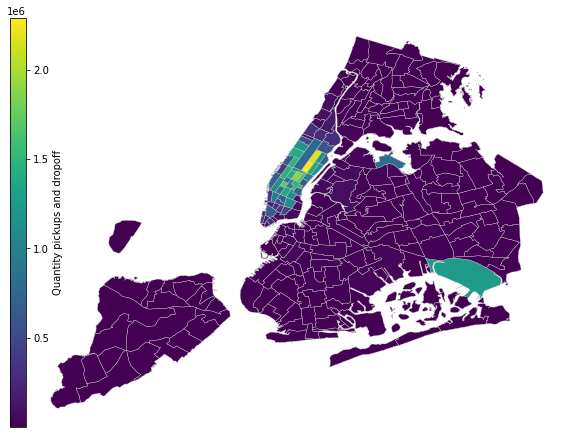

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10,20))
divider = make_axes_locatable(ax)
tmpx = pickup_dropoff.copy()

#To display values
tmpx['total'] = tmpx['total'] 

#resize the colorbar
cax = divider.append_axes("left", size="3%", pad=0) 
tmpx.plot(column='total', ax=ax,cax=cax,  legend=True, 
         legend_kwds={'label': "Quantity pickups and dropoff"})

#Add some borders to the geometries
tmpx['geometry'].boundary.plot(color='#BABABA', ax=ax, linewidth=0.3) 
ax.axis('off')

# Cuales son las horas y dias pico

In [34]:
full_df['pickup_hour'] = full_df['tpep_pickup_datetime'].map(lambda x: x.hour)
full_df['dropoff_hour'] = full_df['tpep_dropoff_datetime'].map(lambda x: x.hour)

In [35]:
df_pickup_hour = pd.DataFrame(
    full_df['pickup_hour'].value_counts().reset_index().values, columns=['hour', 'count_pickup'])

In [36]:
df_dropoff_hour = pd.DataFrame(
    full_df['dropoff_hour'].value_counts().reset_index().values, columns=['hour', 'count_dropoff'])

In [37]:
df_hour = pd.merge(df_pickup_hour, df_dropoff_hour, on='hour', how='inner')

In [38]:
df_hour = df_hour.sort_values(by='hour').set_index('hour')

In [39]:
df_hour.head()

,count_pickup,count_dropoff
hour,,
0,537662,588399
1,372349,400944
2,253285,272467
3,189600,197187
4,161326,164903


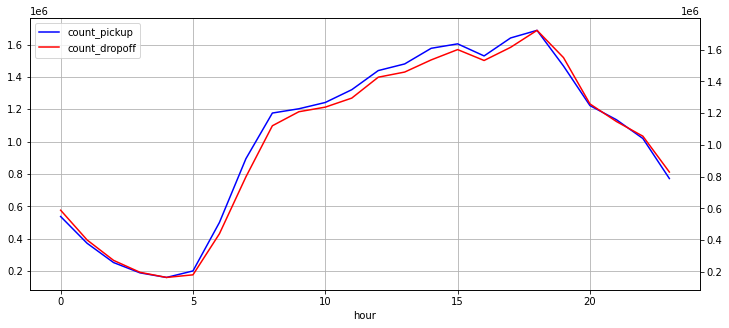

In [40]:
plt.figure(figsize=(12,5))
plt.xlabel('hour')

ax1 = df_hour.count_pickup.plot(color='blue', grid=True, label='count_pickup')
ax2 = df_hour.count_dropoff.plot(color='red', grid=True, secondary_y=True, label='count_dropoff')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [41]:
full_df['pickup_day'] = full_df['tpep_pickup_datetime'].map(lambda x: x.day)
full_df['dropoff_day'] = full_df['tpep_dropoff_datetime'].map(lambda x: x.day)

In [42]:
df_pickup_day = pd.DataFrame(
    full_df['pickup_day'].value_counts().reset_index().values, columns=['day', 'count_pickup'])

In [43]:
df_dropoff_day = pd.DataFrame(
    full_df['dropoff_day'].value_counts().reset_index().values, columns=['day', 'count_dropoff'])

In [44]:
df_day = pd.merge(df_pickup_day, df_dropoff_day, on='day', how='inner')

In [45]:
df_day = df_day.sort_values(by='day').set_index('day')

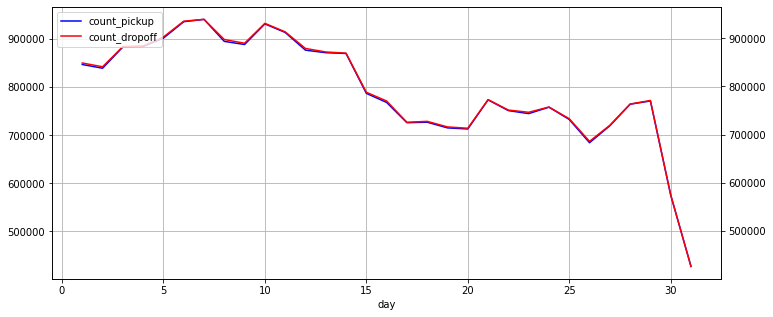

In [46]:
plt.figure(figsize=(12,5))
plt.xlabel('day')

ax1 = df_day.count_pickup.plot(color='blue', grid=True, label='count_pickup')
ax2 = df_day.count_dropoff.plot(color='red', grid=True, secondary_y=True, label='count_dropoff')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [47]:
full_df['pickup_date'] = full_df['tpep_pickup_datetime'].dt.date
full_df['dropoff_date'] = full_df['tpep_dropoff_datetime'].dt.date

In [48]:
full_df['tpep_pickup_datetime'].min()

Timestamp('2020-01-01 00:00:00')

In [49]:
full_df['tpep_pickup_datetime'].max()

Timestamp('2020-12-31 23:55:34')

In [50]:
df_pickup_date = pd.DataFrame(
    full_df['pickup_date'].value_counts().reset_index().values, columns=['date', 'count_pickup'])

In [51]:
df_dropoff_date = pd.DataFrame(
    full_df['dropoff_date'].value_counts().reset_index().values, columns=['date', 'count_dropoff'])

In [52]:
df_date = pd.merge(df_pickup_date, df_dropoff_date, on='date', how='inner')

In [53]:
df_date = df_date.sort_values(by='date').set_index('date')

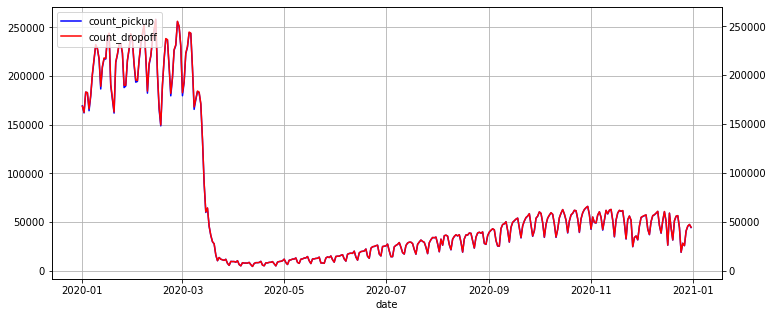

In [54]:
plt.figure(figsize=(12,5))
plt.xlabel('date')

ax1 = df_date.count_pickup.plot(color='blue', grid=True, label='count_pickup')
ax2 = df_date.count_dropoff.plot(color='red', grid=True, secondary_y=True, label='count_dropoff')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

# Missings

In [55]:
full_df['passenger_count'].fillna('').value_counts()

1.0    17510926
2.0     3349053
3.0      872626
         790134
5.0      751700
0.0      489380
6.0      474515
4.0      390086
7.0          91
8.0          58
9.0          51
Name: passenger_count, dtype: int64

In [56]:
full_df['passenger_count'].mode()

0    1.0
dtype: float64

In [57]:
full_df['RatecodeID'].fillna('').value_counts()

1.0     23231050
          790134
2.0       428154
5.0       119953
3.0        39437
4.0        18577
99.0        1165
6.0          150
Name: RatecodeID, dtype: int64

In [58]:
full_df['store_and_fwd_flag'].fillna('').value_counts()

N    23593154
       790134
Y      245332
Name: store_and_fwd_flag, dtype: int64

In [59]:
full_df['congestion_surcharge'].fillna('').value_counts()

2.5      21730357
0.0       2033811
           790134
-2.5        74006
0.75          160
2.75          134
0.5             5
1.0             4
-0.75           4
1.5             2
3.0             1
2.0             1
0.8             1
Name: congestion_surcharge, dtype: int64

In [60]:
full_df['congestion_surcharge'].mean()

2.271175203827961

### airport_fee

In [61]:
full_df['airport_fee'].fillna('').value_counts()

       24628599
0.0          21
Name: airport_fee, dtype: int64

In [62]:
df_geom_ny[df_geom_ny['zone'].str.contains('Airport')]

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
136,132,0.245479,MULTIPOLYGON (((-73.8250346749999 40.663580133...,0.002038,JFK Airport,132,Queens
145,138,0.107467,MULTIPOLYGON (((-73.8712485624251 40.786038151...,0.000537,LaGuardia Airport,138,Queens


In [63]:
full_df.loc[(full_df['PULocationID'].isin([1, 132, 138])), 'airport_fee'] = 1

In [64]:
full_df.loc[full_df['RatecodeID'] == 2, 'airport_fee'] = 1

In [65]:
full_df['airport_fee'].fillna(0, inplace=True)

In [66]:
full_df['airport_fee'].fillna('').value_counts()

0.0    23409675
1.0     1218945
Name: airport_fee, dtype: int64

# Trip distance

In [67]:
full_df[full_df['trip_distance'] < 30].shape

(24613383, 25)

In [68]:
full_df[full_df['trip_distance'] >= 30].shape

(15237, 25)

<AxesSubplot:>

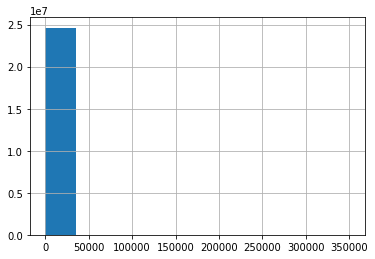

In [69]:
full_df['trip_distance'].hist()

In [70]:
full_df['trip_distance'].describe()

count    2.462862e+07
mean     3.525521e+00
std      3.251670e+02
min     -3.062000e+01
25%      9.900000e-01
50%      1.650000e+00
75%      3.000000e+00
max      3.509149e+05
Name: trip_distance, dtype: float64

In [71]:
full_df['pickup_drop_of'] = full_df['PULocationID'].astype(str) + '_' + full_df['DOLocationID'].astype(str)

In [72]:
full_df['pickup_drop_of'].value_counts()

237_236    173169
236_237    146998
236_236    143236
237_237    126756
264_264    104218
            ...  
123_142         1
101_89          1
155_174         1
108_212         1
239_19          1
Name: pickup_drop_of, Length: 48964, dtype: int64

In [73]:
median_pu_do = full_df.groupby('pickup_drop_of')['trip_distance'].median().rename('median_trip_distance').reset_index()

In [74]:
full_df = pd.merge(full_df, median_pu_do, how='inner', on='pickup_drop_of')

In [75]:
full_df['trip_distance'] = full_df.apply(
    lambda row: row.trip_distance if row.trip_distance <= 4 * row.median_trip_distance else row.median_trip_distance, axis=1)

In [76]:
full_df = full_df[(full_df['trip_distance'] > 0) & (full_df['trip_distance'] < 1000)]

<AxesSubplot:>

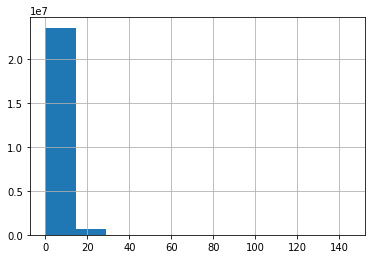

In [77]:
full_df['trip_distance'].hist()

## Amount 

In [78]:
full_df['total_amount'].quantile(.99999) 

410.7065015999973

In [79]:
full_df[full_df['total_amount'] > 500].shape

(126, 27)

<AxesSubplot:>

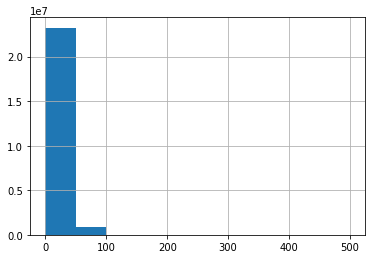

In [80]:
full_df[(full_df.total_amount >= 0) & (full_df.total_amount<= 500)].total_amount.hist()

In [81]:
full_df = full_df[full_df['total_amount'] < 500].reset_index(drop=True)

In [82]:
full_df[
    ['PULocationID', 'DOLocationID',
     'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance',
     'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']]

,PULocationID,DOLocationID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,88,255,2020-03-01 00:31:13,2020-03-01 01:01:42,4.70,1,22.00,3.0,0.5,2.00,0.00,0.3,27.80
1,88,255,2020-03-01 01:06:21,2020-03-01 01:33:20,6.51,1,23.50,0.5,0.5,0.00,0.00,0.3,27.30
2,88,255,2020-03-01 19:07:20,2020-03-01 19:26:55,5.89,1,19.50,0.0,0.5,4.56,0.00,0.3,27.36
3,88,255,2020-03-02 15:33:53,2020-03-02 16:14:23,7.30,1,31.50,2.5,0.5,8.65,0.00,0.3,43.45
4,88,255,2020-03-02 19:47:15,2020-03-02 20:07:43,4.81,1,18.00,1.0,0.5,4.46,0.00,0.3,26.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24269452,127,257,2020-06-30 04:33:00,2020-06-30 04:59:00,19.38,0,75.20,0.0,0.5,0.00,0.00,0.3,76.00
24269453,220,260,2020-06-30 04:56:23,2020-06-30 05:16:36,12.87,0,53.08,0.0,0.5,0.00,6.12,0.3,60.00
24269454,171,249,2020-06-30 08:38:55,2020-06-30 09:19:54,15.24,0,40.96,0.0,0.5,2.75,6.12,0.3,50.63
24269455,212,153,2020-06-30 16:15:00,2020-06-30 16:42:00,6.79,0,17.88,0.0,0.5,4.24,0.00,0.3,22.92


In [84]:
full_df['long_trip'] = full_df['trip_distance'].map(lambda x: 1 if x >= 30 else 0)

## RatecodeID 

In [85]:
full_df.RatecodeID.fillna('').value_counts()

1.0     22982849
          773378
2.0       406626
5.0        51222
3.0        36749
4.0        18114
99.0         467
6.0           52
Name: RatecodeID, dtype: int64

In [86]:
full_df.loc[full_df.RatecodeID.isna(), 'RatecodeID'] = 1

# Save Processed Data

In [87]:
full_df.to_parquet('processed_data.parquet', index=False)